In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import metrics
import random
import statistics

In [2]:
df_train = pd.read_csv('acc_vred.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
df_train

,annual_inc,fico_score,term,loan_amnt,home_ownership,int_rate,all_util,dti
0,0.003442,0.530786,1.0,0.278481,0.666667,0.179907,0.161850,0.00826
1,0.005000,0.828025,0.0,0.189873,0.666667,0.000389,0.248555,0.01553
2,0.009684,0.509554,0.0,0.696203,0.666667,0.100857,0.000000,0.03137
3,0.003273,0.233546,0.0,0.315190,1.000000,0.488707,0.000000,0.00680
4,0.007273,0.573248,1.0,0.518987,0.666667,0.247664,0.000000,0.02169
...,...,...,...,...,...,...,...,...
269355,0.005637,0.276008,1.0,0.594937,0.000000,0.291277,0.294798,0.01546
269356,0.004491,0.318471,1.0,0.351899,1.000000,0.221184,0.369942,0.01485
269357,0.011365,0.254777,1.0,0.797468,0.666667,0.338006,0.260116,0.03089
269358,0.008637,0.467091,1.0,0.908861,0.000000,0.357477,0.456647,0.02250


In [3]:
df_pred_full = pd.read_csv('acc_2_pred_final.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
df_pred_full.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,total_pymnt,funded_amnt,roi
0,0.612658,0.61750,0.0,0.260125,0.472658,0.333333,0.294118,1.000000,0.666667,0.006806,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,25679.660000,24700.0,0.039662
1,0.493671,0.50000,1.0,0.213006,0.245424,0.166667,0.235294,1.000000,0.666667,0.006597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22705.924294,20000.0,0.135296
2,0.250633,0.26000,1.0,0.667445,0.161740,0.833333,0.735294,0.363636,0.666667,0.010935,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11740.500000,10400.0,0.128894
3,0.289873,0.29875,0.0,0.316589,0.229315,0.333333,0.352941,0.454545,0.000000,0.003560,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13708.948530,11950.0,0.147192
4,0.022785,0.03500,0.0,0.294782,0.019398,0.333333,0.323529,0.363636,0.666667,0.006702,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1575.160698,1400.0,0.125115


In [4]:
df_pred = df_pred_full[list(df_train.columns)]

In [5]:
df_pred

,annual_inc,fico_score,term,loan_amnt,home_ownership,int_rate,all_util,dti
0,0.006806,0.445860,0.0,0.612658,0.666667,0.260125,0.150754,0.01706
1,0.006597,0.360934,1.0,0.493671,0.666667,0.213006,0.331658,0.01178
2,0.010935,0.360934,1.0,0.250633,0.666667,0.667445,0.396985,0.02637
3,0.003560,0.339703,0.0,0.289873,0.000000,0.316589,0.386935,0.01120
4,0.006702,0.382166,0.0,0.022785,0.666667,0.294782,0.341709,0.03595
...,...,...,...,...,...,...,...,...
674044,0.023037,0.445860,1.0,1.000000,0.666667,0.400312,0.140704,0.01188
674045,0.006283,0.297240,0.0,0.367089,0.666667,0.201713,0.185930,0.02740
674046,0.018931,0.403397,1.0,0.731646,0.666667,0.338006,0.346734,0.02303
674047,0.015707,0.233546,1.0,0.392405,0.000000,0.291277,0.381910,0.01325


In [6]:
target_train = pd.read_csv('target_2_train_feateng_dwnsmpl.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_train.loan_status_binary.value_counts()

0    134680
1    134680
Name: loan_status_binary, dtype: int64

In [7]:
target_pred = pd.read_csv('target_2_pred_final.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_pred.loan_status_binary.value_counts()

0    539369
1    134680
Name: loan_status_binary, dtype: int64

In [8]:
df_fund_train= pd.read_csv('acc_fund_info.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
df_fund_train

,funded_amnt,total_pymnt
0,2000.0,2499.418453
1,6000.0,7025.750091
2,4800.0,6361.003877
3,25000.0,27886.391190
4,8000.0,9448.774393
...,...,...
269355,24000.0,11031.190000
269356,14400.0,3677.170000
269357,32000.0,8403.350000
269358,36400.0,2539.420000


In [9]:
df_fund_train['funded_amnt'].mean()

14823.051306801306

In [10]:
df_fund_pred = df_pred_full[list(df_fund_train.columns)]

In [11]:
df_fund_pred

,funded_amnt,total_pymnt
0,24700.0,25679.660000
1,20000.0,22705.924294
2,10400.0,11740.500000
3,11950.0,13708.948530
4,1400.0,1575.160698
...,...,...
674044,40000.0,42089.416411
674045,15000.0,15908.001163
674046,29400.0,35848.764532
674047,16000.0,18660.607569


In [12]:
df_fund_pred['roi'] = (df_fund_pred.total_pymnt-df_fund_pred.funded_amnt)/df_fund_pred.funded_amnt
df_fund_pred['label'] = target_pred.loan_status_binary
df_fund_pred

<ipython-input-12-2085cad1e305>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fund_pred['roi'] = (df_fund_pred.total_pymnt-df_fund_pred.funded_amnt)/df_fund_pred.funded_amnt
<ipython-input-12-2085cad1e305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fund_pred['label'] = target_pred.loan_status_binary


,funded_amnt,total_pymnt,roi,label
0,24700.0,25679.660000,0.039662,0
1,20000.0,22705.924294,0.135296,0
2,10400.0,11740.500000,0.128894,0
3,11950.0,13708.948530,0.147192,0
4,1400.0,1575.160698,0.125115,0
...,...,...,...,...
674044,40000.0,42089.416411,0.052235,0
674045,15000.0,15908.001163,0.060533,0
674046,29400.0,35848.764532,0.219346,0
674047,16000.0,18660.607569,0.166288,0


In [13]:
df_fund_pred.describe()

,funded_amnt,total_pymnt,roi,label
count,674049.000000,674049.000000,674049.000000,674049.000000
mean,14399.696387,14812.475528,0.033896,0.199807
std,8703.785691,10338.177714,0.291480,0.399856
min,500.000000,0.000000,-1.000000,0.000000
25%,8000.000000,6837.340000,0.035404,0.000000
50%,12000.000000,12120.801933,0.113155,0.000000
75%,20000.000000,20576.306870,0.187218,0.000000
max,40000.000000,62884.797382,1.170300,1.000000


In [14]:
df_fund_pred.loc[df_fund_pred.label == 1].loc[df_fund_pred.roi > 0]

,funded_amnt,total_pymnt,roi,label
14,16000.0,17396.63,0.087289,1
60,16000.0,19028.76,0.189297,1
165,10400.0,10784.00,0.036923,1
360,5000.0,5256.93,0.051386,1
591,15000.0,16428.53,0.095235,1
...,...,...,...,...
671228,16000.0,17713.57,0.107098,1
672670,5325.0,5331.36,0.001194,1
673227,25000.0,29131.62,0.165265,1
673306,10800.0,23439.24,1.170300,1


In [15]:
df_fund_pred.describe()

,funded_amnt,total_pymnt,roi,label
count,674049.000000,674049.000000,674049.000000,674049.000000
mean,14399.696387,14812.475528,0.033896,0.199807
std,8703.785691,10338.177714,0.291480,0.399856
min,500.000000,0.000000,-1.000000,0.000000
25%,8000.000000,6837.340000,0.035404,0.000000
50%,12000.000000,12120.801933,0.113155,0.000000
75%,20000.000000,20576.306870,0.187218,0.000000
max,40000.000000,62884.797382,1.170300,1.000000


In [16]:
target_train = pd.read_csv('target_2_train_feateng_dwnsmpl.csv.gz',
                  compression='gzip',
                  header=0,
                  sep=',',
                  quotechar='"')
target_train.head()

,loan_status_binary
0,0
1,0
2,0
3,0
4,0


In [17]:
# spliting to train-test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, target_train,
                                                    test_size=0.2, random_state=0)
# Must flatten to fit
y_train = y_train.values.flatten()

X_train

,annual_inc,fico_score,term,loan_amnt,home_ownership,int_rate,all_util,dti
171006,0.005455,0.403397,0.0,0.351899,0.666667,0.415888,0.000000,0.03024
269017,0.004200,0.233546,1.0,0.412658,0.000000,0.778037,0.364162,0.03432
50978,0.007728,0.488323,0.0,0.367089,0.000000,0.000389,0.161850,0.00838
133279,0.003439,0.445860,0.0,0.240506,0.666667,0.139798,0.000000,0.02549
38864,0.005455,0.297240,1.0,0.658228,1.000000,0.713396,0.000000,0.02184
...,...,...,...,...,...,...,...,...
211543,0.005228,0.276008,1.0,0.713924,0.000000,0.655763,0.000000,0.03202
86293,0.003637,0.297240,1.0,0.240506,1.000000,0.747274,0.000000,0.01533
122579,0.003637,0.700637,0.0,0.149367,0.666667,0.000389,0.213873,0.02203
152315,0.011819,0.233546,1.0,0.334177,0.000000,0.540498,0.000000,0.00764


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.set_params(random_state=0)

grid_para_rf = [{
    "criterion": ["entropy"],
    "min_samples_leaf": [5],
    "min_samples_split": [2],
    "n_estimators":[500],
    "max_depth":[50]
}]

gs_rf = GridSearchCV(rf, grid_para_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose = 1)
%time gs_rf.fit(X_train, y_train)

print('\ntrain score (ROC_AUC) : %f'%gs_rf.best_score_ )
print('-'*70)
print('test score (ROC_AUC) : %f'%gs_rf.score(X_test,y_test) )
print('-'*70)
gs_rf.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 4min 2s

train score (ROC_AUC) : 0.704567
----------------------------------------------------------------------
test score (ROC_AUC) : 0.706522
----------------------------------------------------------------------


{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

# roc_auc_score =
grid_para_boost = [{
    "min_samples_leaf": [10],
    "n_estimators":[500],
#     "subsample":[0.25,0.5,1.0],
#     "criterion":["friedman_mse", "mae"],
#     "min_samples_split": np.linspace(start=2, stop=30, num=5, dtype=int),
    "min_samples_split": [30],
    "max_depth": [5],
    "random_state":[0]}]

gs_gb = GridSearchCV(gbm, grid_para_boost,scoring= 'roc_auc',
                                 cv=5, n_jobs = -1, verbose=2)

%time gs_gb.fit(X_train, y_train)
print('\ntrain score (ROC_AUC) : %f'%gs_gb.best_score_ )
print('-'*70)
print('test score (ROC_AUC) : %f'%gs_gb.score(X_test,y_test) )
print('-'*70)
gs_gb.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 4min 45s

train score (ROC_AUC) : 0.711265
----------------------------------------------------------------------
test score (ROC_AUC) : 0.712011
----------------------------------------------------------------------


{'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 500,
 'random_state': 0}

In [20]:
import xgboost
from sklearn import model_selection as ms

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=0, shuffle=True)

xgb_clsfr = xgboost.XGBClassifier()

objective_ = ['binary:logistic']
evalmetric = ['auc']
uselabelencoder = [False]
treemethod = ['gpu_hist']
predictor_ = ['gpu_predictor']
njobs = [-1]
randomstate = [0]
booster_ = ['gbtree']

nestimators = [400]
minchildweight = [11]
maxdepth = [7]
learningrate = [0.025]
gamma_ = [1.75]
subsample_ = [0.8]
colsamplebytree = [0.6]

gparam_xgb = {'objective': objective_,
              'eval_metric': evalmetric,
              'use_label_encoder': uselabelencoder,
              'tree_method': treemethod,
              'predictor': predictor_,
              'n_jobs': njobs,
              'booster': booster_,
              'n_estimators': nestimators,
              'min_child_weight': minchildweight,
              'max_depth': maxdepth,
              'learning_rate': learningrate,
              'gamma': gamma_,
              'subsample': subsample_,
              'colsample_bytree': colsamplebytree,
              'random_state': randomstate}

gs_xgb = ms.GridSearchCV(xgb_clsfr, gparam_xgb, cv=n_folds, refit=True,
                          scoring='roc_auc', return_train_score=True, verbose=1)

%time gs_xgb.fit(X_train, y_train)

print('\ntrain score (ROC_AUC) : %f'%gs_xgb.best_score_ )
print('-'*70)
print('test score (ROC_AUC) : %f'%gs_xgb.score(X_test,y_test) )
print('-'*70)
gs_xgb.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 20.5 s

train score (ROC_AUC) : 0.713422
----------------------------------------------------------------------
test score (ROC_AUC) : 0.713461
----------------------------------------------------------------------


{'booster': 'gbtree',
 'colsample_bytree': 0.6,
 'eval_metric': 'auc',
 'gamma': 1.75,
 'learning_rate': 0.025,
 'max_depth': 7,
 'min_child_weight': 11,
 'n_estimators': 400,
 'n_jobs': -1,
 'objective': 'binary:logistic',
 'predictor': 'gpu_predictor',
 'random_state': 0,
 'subsample': 0.8,
 'tree_method': 'gpu_hist',
 'use_label_encoder': False}

In [21]:
# printing the confusion matrix for Gradient boost

from sklearn.metrics import confusion_matrix

optimum_rf = gs_rf.best_estimator_
predictions_rf = optimum_rf.predict(X_test)
labels_rf = y_test
conf_mat_rf = confusion_matrix(labels_rf, predictions_rf)
print ("Random Forest confusion matrix")
print ('-'*70)
print(conf_mat_rf)

Random Forest confusion matrix
----------------------------------------------------------------------
[[17103  9867]
 [ 8955 17947]]


In [22]:
optimum_gradientBoost = gs_gb.best_estimator_
predictions_gb = optimum_gradientBoost.predict(X_test)
labels = y_test
conf_mat = confusion_matrix(labels, predictions_gb)
print ("Gradient boost confusion matrix")
print ('-'*70)
print(conf_mat)

Gradient boost confusion matrix
----------------------------------------------------------------------
[[17139  9831]
 [ 8872 18030]]


In [23]:
optimum_xgb = gs_xgb.best_estimator_
predictions_xgb = optimum_xgb.predict(X_test)
labels_xgb = y_test
conf_mat_xgb = confusion_matrix(labels_xgb, predictions_xgb)
print ("XGBoost confusion matrix")
print ('-'*70)
print(conf_mat_xgb)

XGBoost confusion matrix
----------------------------------------------------------------------
[[17083  9887]
 [ 8793 18109]]


# Calculate ROI for all 4 quadrants and compare

In [24]:
ypred_rf = gs_rf.predict(X_test)
ypred_rf = ypred_rf.reshape(53872, 1)

# predicted as default and actually default
true_pos_rf = np.logical_and(y_test == ypred_rf, ypred_rf == 1)

# predicted as default, but fully paid
false_pos_rf = np.logical_and(y_test != ypred_rf, ypred_rf == 1)

# predicted as paid off and actually paid off
true_neg_rf = np.logical_and(y_test == ypred_rf, ypred_rf == 0)

# predicted as paid off, but default
false_neg_rf = np.logical_and(y_test != ypred_rf, ypred_rf == 0)

# getting indices of the above
true_pos_rf_index = list(true_pos_rf[true_pos_rf['loan_status_binary']==True].index)
false_pos_rf_index = list(false_pos_rf[false_pos_rf['loan_status_binary']==True].index)
true_neg_rf_index = list(true_neg_rf[true_neg_rf['loan_status_binary']==True].index)
false_neg_rf_index = list(false_neg_rf[false_neg_rf['loan_status_binary']==True].index)

# calculated mean using 'roi' column for each quadrant
print('The ROI for the true positive quadrant is:')
print(df_fund_pred.iloc[true_pos_rf_index][['roi']].mean())
print('\n')
print('The ROI for the false positive quadrant is:')
print(df_fund_pred.iloc[false_pos_rf_index][['roi']].mean())
print('\n')
print('The ROI for the true negative quadrant is:')
print(df_fund_pred.iloc[true_neg_rf_index][['roi']].mean())
print('\n')
print('The ROI for the false negative quadrant is:')
df_fund_pred.iloc[false_neg_rf_index][['roi']].mean()

The ROI for the true positive quadrant is:
roi   -0.014387
dtype: float64


The ROI for the false positive quadrant is:
roi    0.043303
dtype: float64


The ROI for the true negative quadrant is:
roi    0.038497
dtype: float64


The ROI for the false negative quadrant is:


roi   -0.007685
dtype: float64

In [25]:
ypred_gb = gs_gb.predict(X_test)
ypred_gb = ypred_gb.reshape(53872, 1)

# predicted as default and actually default
true_pos_gb = np.logical_and(y_test == ypred_gb, ypred_gb == 1)

# predicted as default, but fully paid
false_pos_gb = np.logical_and(y_test != ypred_gb, ypred_gb == 1)

# predicted as paid off and actually paid off
true_neg_gb = np.logical_and(y_test == ypred_gb, ypred_gb == 0)

# predicted as paid off, but default
false_neg_gb = np.logical_and(y_test != ypred_gb, ypred_gb == 0)

# getting indices of the above
true_pos_gb_index = list(true_pos_gb[true_pos_gb['loan_status_binary']==True].index)
false_pos_gb_index = list(false_pos_gb[false_pos_gb['loan_status_binary']==True].index)
true_neg_gb_index = list(true_neg_gb[true_neg_gb['loan_status_binary']==True].index)
false_neg_gb_index = list(false_neg_gb[false_neg_gb['loan_status_binary']==True].index)

# calculated mean using 'roi' column for each quadrant
print('The ROI for the true positive quadrant is:')
print(df_fund_pred.iloc[true_pos_gb_index][['roi']].mean())
print('\n')
print('The ROI for the false positive quadrant is:')
print(df_fund_pred.iloc[false_pos_gb_index][['roi']].mean())
print('\n')
print('The ROI for the true negative quadrant is:')
print(df_fund_pred.iloc[true_neg_gb_index][['roi']].mean())
print('\n')
print('The ROI for the false negative quadrant is:')
df_fund_pred.iloc[false_neg_gb_index][['roi']].mean()

The ROI for the true positive quadrant is:
roi   -0.013712
dtype: float64


The ROI for the false positive quadrant is:
roi    0.04375
dtype: float64


The ROI for the true negative quadrant is:
roi    0.038251
dtype: float64


The ROI for the false negative quadrant is:


roi   -0.008995
dtype: float64

In [26]:
ypred_xgb = gs_xgb.predict(X_test)
ypred_xgb = ypred_xgb.reshape(53872, 1)

# predicted as default and actually default
true_pos_xgb = np.logical_and(y_test == ypred_xgb, ypred_xgb == 1)

# predicted as default, but fully paid
false_pos_xgb = np.logical_and(y_test != ypred_xgb, ypred_xgb == 1)

# predicted as paid off and actually paid off
true_neg_xgb = np.logical_and(y_test == ypred_xgb, ypred_xgb == 0)

# predicted as paid off, but default
false_neg_xgb = np.logical_and(y_test != ypred_xgb, ypred_xgb == 0)

# getting indices of the above
true_pos_xgb_index = list(true_pos_xgb[true_pos_xgb['loan_status_binary']==True].index)
false_pos_xgb_index = list(false_pos_xgb[false_pos_xgb['loan_status_binary']==True].index)
true_neg_xgb_index = list(true_neg_xgb[true_neg_xgb['loan_status_binary']==True].index)
false_neg_xgb_index = list(false_neg_xgb[false_neg_xgb['loan_status_binary']==True].index)

# calculated mean using 'roi' column for each quadrant
print('The ROI for the true positive quadrant is:')
print(df_fund_pred.iloc[true_pos_xgb_index][['roi']].mean())
print('\n')
print('The ROI for the false positive quadrant is:')
print(df_fund_pred.iloc[false_pos_xgb_index][['roi']].mean())
print('\n')
print('The ROI for the true negative quadrant is:')
print(df_fund_pred.iloc[true_neg_xgb_index][['roi']].mean())
print('\n')
print('The ROI for the false negative quadrant is:')
df_fund_pred.iloc[false_neg_xgb_index][['roi']].mean()

The ROI for the true positive quadrant is:
roi   -0.014089
dtype: float64


The ROI for the false positive quadrant is:
roi    0.044303
dtype: float64


The ROI for the true negative quadrant is:
roi    0.037913
dtype: float64


The ROI for the false negative quadrant is:


roi   -0.008176
dtype: float64

In [27]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score_rf = metrics.f1_score(labels_rf, predictions_rf)
recall_score_rf = metrics.recall_score(labels_rf, predictions_rf)
precision_score_rf = metrics.precision_score(labels_rf, predictions_rf)
print ("Random Forest performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score_rf))
print('recall score: {0:0.2f}'.format(recall_score_rf))
print('precision score: {0:0.2f}'.format(precision_score_rf))

Random Forest performance
----------------------------------------------------------------------
F1 score: 0.66
recall score: 0.67
precision score: 0.65


In [28]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score_gb = metrics.f1_score(labels, predictions_gb)
recall_score_gb = metrics.recall_score(labels, predictions_gb)
precision_score_gb = metrics.precision_score(labels, predictions_gb)
print ("Gradient Boost performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score_gb))
print('recall score: {0:0.2f}'.format(recall_score_gb))
print('precision score: {0:0.2f}'.format(precision_score_gb))

Gradient Boost performance
----------------------------------------------------------------------
F1 score: 0.66
recall score: 0.67
precision score: 0.65


In [29]:
# F1 score 
# F1 = 2 * (precision * recall) / (precision + recall)

f1_score_xgb = metrics.f1_score(labels_xgb, predictions_xgb)
recall_score_xgb = metrics.recall_score(labels_xgb, predictions_xgb)
precision_score_xgb = metrics.precision_score(labels_xgb, predictions_xgb)
print ("XGBoost performance")
print ('-'*70)
print('F1 score: {0:0.2f}'.format(f1_score_xgb))
print('recall score: {0:0.2f}'.format(recall_score_xgb))
print('precision score: {0:0.2f}'.format(precision_score_xgb))

XGBoost performance
----------------------------------------------------------------------
F1 score: 0.66
recall score: 0.67
precision score: 0.65


In [30]:
# ROC-AUC score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

from sklearn.metrics import roc_auc_score

# RF
print ("Random Forest ROC-AUC score")
print ('-'*70)
roc_auc_score(labels_rf, predictions_rf)

Random Forest ROC-AUC score
----------------------------------------------------------------------


0.6506370876569336

In [31]:
# GB
print ("Gradient boost ROC-AUC score")
print ('-'*70)
roc_auc_score(labels, predictions_gb)

Gradient boost ROC-AUC score
----------------------------------------------------------------------


0.652847132123526

In [32]:
# XGB
print ("XGBoost ROC-AUC score")
print ('-'*70)
roc_auc_score(labels_xgb, predictions_xgb)

XGBoost ROC-AUC score
----------------------------------------------------------------------


0.6532772338616712

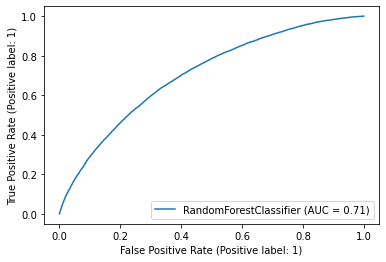

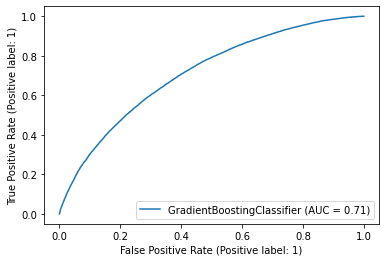

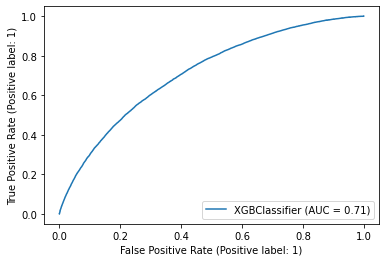

In [33]:
# Receiver operating characteristic (ROC) curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve

from sklearn import metrics
metrics.plot_roc_curve(optimum_rf, X_test, y_test) 
metrics.plot_roc_curve(optimum_gradientBoost, X_test, y_test) 
metrics.plot_roc_curve(optimum_xgb, X_test, y_test)

In [34]:
predictions_rf_pred = optimum_rf.predict(df_pred)
prediction_df_rf = pd.DataFrame(predictions_rf_pred, columns=['label'])
prediction_df_rf

,label
0,0
1,0
2,1
3,1
4,0
...,...
674044,1
674045,0
674046,1
674047,1


In [35]:
predictions_gb_pred = optimum_gradientBoost.predict(df_pred)
prediction_df = pd.DataFrame(predictions_gb_pred, columns=['label'])
prediction_df

,label
0,0
1,0
2,1
3,1
4,0
...,...
674044,1
674045,0
674046,0
674047,1


In [36]:
predictions_xgb_pred = optimum_xgb.predict(df_pred)
prediction_df_xgb = pd.DataFrame(predictions_xgb_pred, columns=['label'])
prediction_df_xgb

,label
0,0
1,0
2,1
3,1
4,0
...,...
674044,1
674045,0
674046,1
674047,1


In [37]:
prediction_df_rf.label.value_counts()

0    398579
1    275470
Name: label, dtype: int64

In [38]:
prediction_df.label.value_counts()

0    404732
1    269317
Name: label, dtype: int64

In [39]:
prediction_df_xgb.label.value_counts()

0    403430
1    270619
Name: label, dtype: int64

In [40]:
paid_off_index = list(prediction_df.loc[ prediction_df.label== 0,:].index)
paid_off_index_xgb = list(prediction_df_xgb.loc[ prediction_df_xgb.label== 0,:].index)
paid_off_index_rf = list(prediction_df_rf.loc[ prediction_df_rf.label== 0,:].index)
all_index = list(df_pred.index)

In [41]:
#RF
# Average ROI analysis using our model

random.seed(0)

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI_rf = []
for i in range(n_iter):
    random_list = random.sample(paid_off_index_rf, n_loans)
    for j in random_list:
        funded = np.sum(df_fund_pred.iloc[j,0])
        paid = np.sum(df_fund_pred.iloc[j,1])
    ROI_rf.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI using xgb model in percentage :')
print(statistics.mean(ROI_rf)*100)

--------------------------------------------------
average of ROI using xgb model in percentage :
6.462554832201047


In [42]:
# Average ROI analysis using our model

random.seed(0)

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI = []
for i in range(n_iter):
    funded = 0
    paid = 0
    random_list = random.sample(paid_off_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    ROI.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI using our model in percentage :')
print(statistics.mean(ROI)*100)

--------------------------------------------------
average of ROI using our model in percentage :
6.342427937033284


In [43]:
#XGB
# Average ROI analysis using our model

random.seed(0)

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI_xgb = []
for i in range(n_iter):
    funded = 0
    paid = 0
    random_list = random.sample(paid_off_index_xgb, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    ROI_xgb.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI using xgb model in percentage :')
print(statistics.mean(ROI_xgb)*100)

--------------------------------------------------
average of ROI using xgb model in percentage :
6.411164888005841


In [44]:
# Average ROI analysis NOT using our model

random.seed(0)

n_loans = 5       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
ROI_n = []
for i in range(n_iter):
    funded = 0
    paid = 0
    random_list = random.sample(all_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    ROI_n.append((paid-funded)/funded)
print('-'* 50)
print('average of ROI NOT using our model in percentage :')
print(statistics.mean(ROI_n)*100)

--------------------------------------------------
average of ROI NOT using our model in percentage :
3.02681538622336


In [45]:
# General ROI analysis using our model

funded = 0
paid = 0
for i in paid_off_index_rf:
        funded = funded + df_fund_pred.iloc[i,0]
        paid = paid + df_fund_pred.iloc[i,1]
ROI_rf = (paid-funded)/funded
print('-'* 50)
print('ROI using our model in percentage :')
print(ROI_rf*100)

--------------------------------------------------
ROI using our model in percentage :
6.23825670011101


In [46]:
# General ROI analysis using our model

funded = 0
paid = 0
for i in paid_off_index:
        funded = funded + df_fund_pred.iloc[i,0]
        paid = paid + df_fund_pred.iloc[i,1]
ROI = (paid-funded)/funded
print('-'* 50)
print('ROI using our model in percentage :')
print(ROI*100)

--------------------------------------------------
ROI using our model in percentage :
6.390916526009319


In [47]:
# General ROI analysis using our model
funded_xgb = 0
paid_xgb = 0
for i in paid_off_index_xgb:
        funded_xgb = funded_xgb + df_fund_pred.iloc[i,0]
        paid_xgb = paid_xgb + df_fund_pred.iloc[i,1]
ROI_xgb = (paid_xgb-funded_xgb)/funded_xgb
print('-'* 50)
print('ROI using our model in percentage :')
print(ROI_xgb*100)

--------------------------------------------------
ROI using our model in percentage :
6.32944314859984


In [48]:
# General ROI analysis NOT using our model
funded = 0
paid = 0
for i in all_index:
        funded = funded + df_fund_pred.iloc[i,0]
        paid = paid + df_fund_pred.iloc[i,1]
ROI = (paid-funded)/funded
print('-'* 50)
print('ROI NOT using our model in percentage :')
print(ROI*100)

--------------------------------------------------
ROI NOT using our model in percentage :
2.8665822504442433


<AxesSubplot:ylabel='Frequency'>

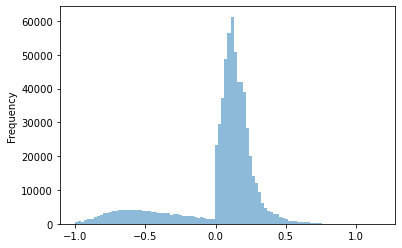

In [49]:
df_fund_pred.roi.plot.hist(bins=100, alpha=0.5)

In [50]:
# Average ROI analysis  for $10,000 investment

random.seed(0)

n_loans = 2       # number of loans to invest by an average investor
n_iter = 10000      # number of of investors to average over-1
investment = 10000 # investment value in dollars

ROI_rf = []
i=0
while i <= n_iter:
    random_list = random.sample(paid_off_index_rf, n_loans)
    for j in random_list:
        funded_rf = np.sum(df_fund_pred.iloc[j,0])
        paid_rf = np.sum(df_fund_pred.iloc[j,1])
    if funded_rf <= investment:
        ROI_rf.append((paid_rf-funded_rf)/funded_rf)
        i = i+1

ROI = []
i=0
while i <= n_iter:
    funded = 0
    paid = 0
    random_list = random.sample(paid_off_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    if funded <= investment:
        ROI.append((paid-funded)/funded)
        i = i+1
        
ROI_xgb = []
i=0
while i <= n_iter:
    funded_xgb = 0
    paid_xgb = 0
    random_list = random.sample(paid_off_index_xgb, n_loans)
    for j in random_list:
        funded_xgb = funded_xgb + df_fund_pred.iloc[j,0]
        paid_xgb = paid_xgb + df_fund_pred.iloc[j,1]
    if funded_xgb <= investment:
        ROI_xgb.append((paid_xgb-funded_xgb)/funded_xgb)
        i = i+1

ROI_n = []
i=0
while i <= n_iter:
    funded = 0
    paid = 0
    random_list = random.sample(all_index, n_loans)
    for j in random_list:
        funded = funded + df_fund_pred.iloc[j,0]
        paid = paid + df_fund_pred.iloc[j,1]
    if funded <= investment:
        ROI_n.append((paid-funded)/funded)
        i = i+1
        
        
        
print('-'* 50)
print('average of ROI using our Random Forest model in percentage :')
print(statistics.mean(ROI_rf)*100)
print('average of ROI using our Gradient Boosting model in percentage :')
print(statistics.mean(ROI)*100)
print('average of ROI using our XGBoost model in percentage :')
print(statistics.mean(ROI_xgb)*100)
print('average of ROI NOT using our model in percentage :')
print(statistics.mean(ROI_n)*100)

--------------------------------------------------
average of ROI using our Random Forest model in percentage :
5.806645659569226
average of ROI using our Gradient Boosting model in percentage :
6.09153407953905
average of ROI using our XGBoost model in percentage :
6.01198796264352
average of ROI NOT using our model in percentage :
4.884699299831055


In [63]:
# Average ROI analysis  for different investment ranges 

random.seed(0)

result = []

for n in [10000, 20000,30000, 40000, 50000]:
    n_loans = 4       # number of loans to invest by an average investor
    n_iter = 10000      # number of of investors to average over-1
    investment_low = n
    investment_high = n+10000  # investment value in dollars
    
    ROI = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(paid_off_index_rf, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI_rf.append((paid-funded)/funded)
            i = i+1
    
    ROI = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(paid_off_index, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI.append((paid-funded)/funded)
            i = i+1
    
    ROI_xgb = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(paid_off_index_xgb, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI_xgb.append((paid-funded)/funded)
            i = i+1

            
    ROI_n = []
    i=0
    while i <= n_iter:
        funded = 0
        paid = 0
        random_list = random.sample(all_index, n_loans)
        for j in random_list:
            funded = funded + df_fund_pred.iloc[j,0]
            paid = paid + df_fund_pred.iloc[j,1]
        if funded <= investment_high and funded >= investment_low:
            ROI_n.append((paid-funded)/funded)
            i = i+1
    print('-'* 50)
    print('average of ROI for $%d investement using our Random Fores model in percentage :'%n) 
    print(statistics.mean(ROI_rf)*100)
    print('average of ROI for $%d investement using our Gradient Boosting model in percentage :'%n) 
    print(statistics.mean(ROI)*100)
    print('average of ROI for $%d investement using our XGBoost model in percentage :'%n) 
    print(statistics.mean(ROI_xgb)*100)
    print('average of ROI for $%d investement NOT using our model in percentage :'%n )
    print(statistics.mean(ROI_n)*100)
    
    temp = (statistics.mean(ROI_n),statistics.mean(ROI_rf),
            statistics.mean(ROI),statistics.mean(ROI_xgb))
    result.append(temp)
    
result = pd.DataFrame(result,columns=['Naive Sampling','Random Forest Model',
                                      'Gradient Boosting Model','XGBoosting Model'])
result

--------------------------------------------------
average of ROI for $10000 investement using our Random Fores model in percentage :
6.038095715001091
average of ROI for $10000 investement using our Gradient Boosting model in percentage :
6.1719851513216195
average of ROI for $10000 investement using our XGBoost model in percentage :
5.896073368573289
average of ROI for $10000 investement NOT using our model in percentage :
4.585480573203911
--------------------------------------------------
average of ROI for $20000 investement using our Random Fores model in percentage :
6.037101869291004
average of ROI for $20000 investement using our Gradient Boosting model in percentage :
6.3421947052483025
average of ROI for $20000 investement using our XGBoost model in percentage :
6.1098776293592465
average of ROI for $20000 investement NOT using our model in percentage :
3.9068315055211196
--------------------------------------------------
average of ROI for $30000 investement using our Rando

,Naive Sampling,Random Forest Model,Gradient Boosting Model,XGBoosting Model
0,0.045855,0.060381,0.061720,0.058961
1,0.039068,0.060371,0.063422,0.061099
2,0.034407,0.060588,0.061549,0.062906
3,0.031119,0.060753,0.063596,0.062512
4,0.028852,0.060757,0.065911,0.062805


<AxesSubplot:>

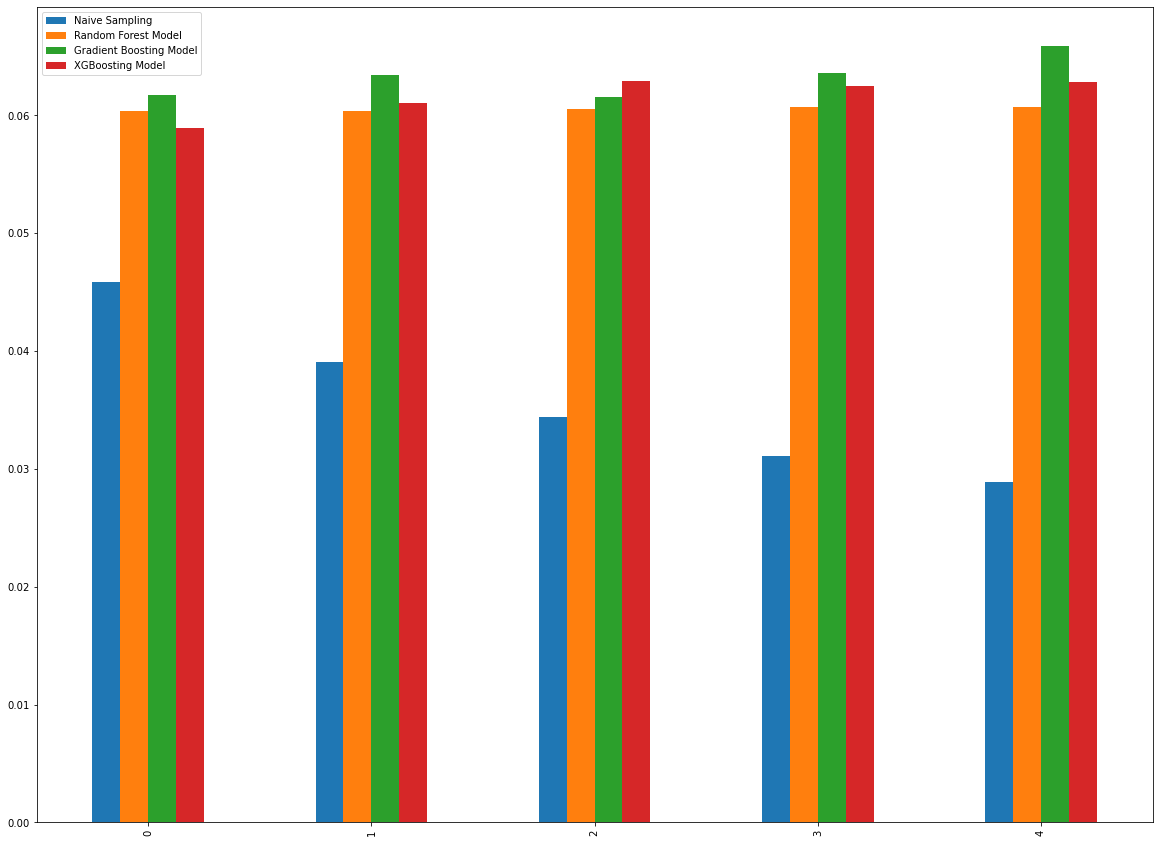

In [68]:
# graphing the results
# result = result.set_index('Investment')
result.plot(kind='bar', figsize=(20,15))